In [1]:
%matplotlib notebook

In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy.ma as ma

import os

from mpl_toolkits.axes_grid1 import Divider, Size 
from mpl_toolkits.axes_grid1.mpl_axes import Axes

In [3]:
def Q2th (deg,lam): # function to convert 2theta into scattering vector, Q
	
	return 4.0*np.pi*np.sin(deg/360.0*np.pi)/lam

In [5]:
data = np.loadtxt('./nuc/FeCl2btd-d4_PND_5K_seruzi_riet.dat') #PXRD data file which has been converted to .dat or .xy
rugn = np.genfromtxt('./nuc/FeCl2btd-d4_PND_5K_seruzi_riet_rug_marks.dat')

In [ ]:
fig = plt.figure(100, figsize=(5.3, 2.5))
ax1 = plt.subplot()
ax1.tick_params(axis='both', labelsize=8, direction="in")

Q = 4*np.pi*np.sin(data[:,0]/2/180*np.pi)/2.41

obs = ax1.scatter (Q,data[:,1], s=3, label='$I_{obs}$', color='peru')
calc, = ax1.plot (Q,data[:,2], linewidth=1.5, label='$I_{calc}$', color='saddlebrown')
diff, = ax1.plot (Q,data[:,3]-100, linewidth=1.5, label='$I_{obs}$-$I_{calc}$', color='lightgrey')
plt.fill_between(Q, (data[:,1] - data[:,4]), (data[:,1] + data[:,4]), color='sandybrown', alpha=0.2)
np.argmax(rugn>3)
ax1.plot(rugn[:,4], ([400]*len(rugn)), '|', ms=7, c='saddlebrown')

ax1.set_xlabel('$Q$ (Å$^{-1}$)', fontsize=9)
ax1.set_ylabel('$I$', fontsize=9)
ax1.set_xlim((0.28,4.52))
plt.yticks([])
plt.xticks(fontsize=8)
ax1.tick_params(axis='both', labelsize=8)
ax1.legend([obs, calc, diff],['$I_{\mathrm{obs\;(5\; K)}}$','$I_{\mathrm{calc}}$','$I_{\mathrm{obs}}-I_{\mathrm{calc}}$'], frameon=False, loc='upper right', fontsize=7)
plt.tight_layout()
#plt.savefig('FeCl2btd-d4_PND_5K_seruzi_riet.pdf', bbox_inches='tight', transparent=True) #The output of your plot as an image or a pdf
plt.show()

<IPython.core.display.Javascript object>


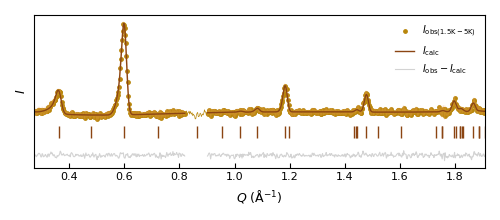

In [6]:
riet = np.genfromtxt('./mag/FeCl2btd-d4_seruzi_1p5K-5K_PND_ORNL_riet_mB1+_fit.dat')
rugm = np.genfromtxt('./mag/FeCl2btd-d4_seruzi_1p5K-5K_PND_ORNL_riet_mB1+_fit_rug_marks.dat')

full=riet
riet = ma.array(riet)
start = np.argmax(riet[:,0]>18.1)
stop = np.argmax(riet[:,0]>19.9)
riet[start:stop]=ma.masked



fig = plt.figure(3, figsize=(5, 2.2))
ax1 = plt.subplot()
ax1.tick_params(axis='both', labelsize=8, direction="in")


x = Q2th(riet[:,0],2.41)
x2 = Q2th(full[:,0],2.41)
sigma = riet[:,4]


offset = 200
obs = ax1.scatter (x,riet[:,1]+offset, s=6, label='$I_{\mathrm{obs} (2\mathrm{K}-30\mathrm{K})}$', color='darkgoldenrod')

plt.plot(x2[start:stop],full[start:stop,1]+offset,c='darkgoldenrod',lw=0.5)
plt.fill_between(x, (riet[:,1] - sigma)+offset, (riet[:,1] + sigma)+offset, color='sandybrown', alpha=0.2)


calc, = ax1.plot (x, riet[:,2]+offset, linewidth=1, label='$I_{\mathrm{calc}}$', color='saddlebrown')


diff, = ax1.plot (x,riet[:,3]-200, linewidth=0.8, label='$I_{\mathrm{obs}}-I_{\mathrm{calc}}$', color='lightgrey')

ax1.plot(rugm[:,4], ([0.5]*len(rugm)), '|',ms=8, c='saddlebrown')



ax1.set_xlabel('$Q$ (Å$^{-1}$)',fontsize=9)
ax1.set_ylabel('$I$',fontsize=9)
ax1.set_xlim((0.27,1.91))

plt.yticks(ticks=[], labels=[])

ax1.legend([obs, calc, diff],['$I_{\mathrm{obs} (1.5\mathrm{K}-5\mathrm{K})}$','$I_{\mathrm{calc}}$','$I_{\mathrm{obs}}-I_{\mathrm{calc}}$'],ncol=1, frameon=False, loc='upper right',fontsize=7)#,bbox_to_anchor=(0., 1))
plt.tight_layout()
#plt.savefig('PND_FeCl2btd-d4_seruzi_mag_riet.pdf', bbox_inches='tight', transparent=True) #The output of your plot as an image or a pdf
plt.show()

<IPython.core.display.Javascript object>


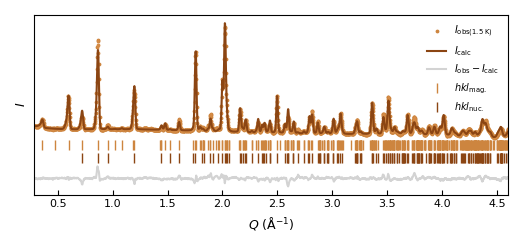

In [9]:
data = np.loadtxt('./nuc_mag/FeCl2btd-d4_seruzi_1p5K_nuc_mag_combined_mB1+_fit.dat') #PXRD data file which has been converted to .dat or .xy
rug = np.genfromtxt('./nuc_mag/FeCl2btd-d4_seruzi_1p5K_nuc_mag_combined_mB1+_fit_rug_marks.dat')
rugm = np.genfromtxt('./nuc_mag/FeCl2btd-d4_seruzi_1p5K-5K_PND_ORNL_riet_mB1+_all_rug_marks.dat')

fig = plt.figure(101, figsize=(5.23, 2.47))
ax1 = plt.subplot()
ax1.tick_params(axis='both', labelsize=8, direction="in")

Q = 4*np.pi*np.sin(data[:,0]/2/180*np.pi)/2.41

obs = ax1.scatter (Q,data[:,1]+600, s=3, label='$I_{obs}$', color='peru')
calc, = ax1.plot (Q,data[:,2]+600, linewidth=1.5, label='$I_{calc}$', color='saddlebrown')
diff, = ax1.plot (Q,data[:,3]+190, linewidth=1.5, label='$I_{obs}$-$I_{calc}$', color='lightgrey')
plt.fill_between(Q, (data[:,1] - data[:,4])+600, (data[:,1] + data[:,4])+600, color='sandybrown', alpha=0.2)
nuc, = ax1.plot(rugn[:,4], ([700]*len(rugn)), '|', ms=7, c='saddlebrown')
mag, = ax1.plot(rugm[:,4], ([1000]*len(rugm)), '|', ms=7, c='peru')

ax1.set_xlabel('$Q$ (Å$^{-1}$)', fontsize=9)
ax1.set_ylabel('$I$', fontsize=9)
ax1.set_xlim((0.28,4.6))
#ax1.set_ylim((-25,450))
plt.yticks([])
plt.xticks(fontsize=8)
ax1.tick_params(axis='both', labelsize=8)
ax1.legend([obs, calc, diff, mag, nuc],['$I_{\mathrm{obs}(1.5\;\mathrm{K})}$','$I_{\mathrm{calc}}$','$I_{\mathrm{obs}}-I_{\mathrm{calc}}$','$hkl_\mathrm{mag.}$','$hkl_\mathrm{nuc.}$'], frameon=False, loc='upper right', fontsize=7)
plt.tight_layout()
#plt.savefig('FeCl2btd-d4_seruzi_1p5K_nuc_mag_combined_mB1+_fit.pdf', bbox_inches='tight', transparent=True) #The output of your plot as an image or a pdf
plt.show()